Init Library

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString
from adjustText import adjust_text

Hide Warning Deprecated Shapely 2.0

In [244]:
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

Memuat Shape file

In [245]:
jbmap = gpd.read_file('shape/jawabarat.shp')

<AxesSubplot:>

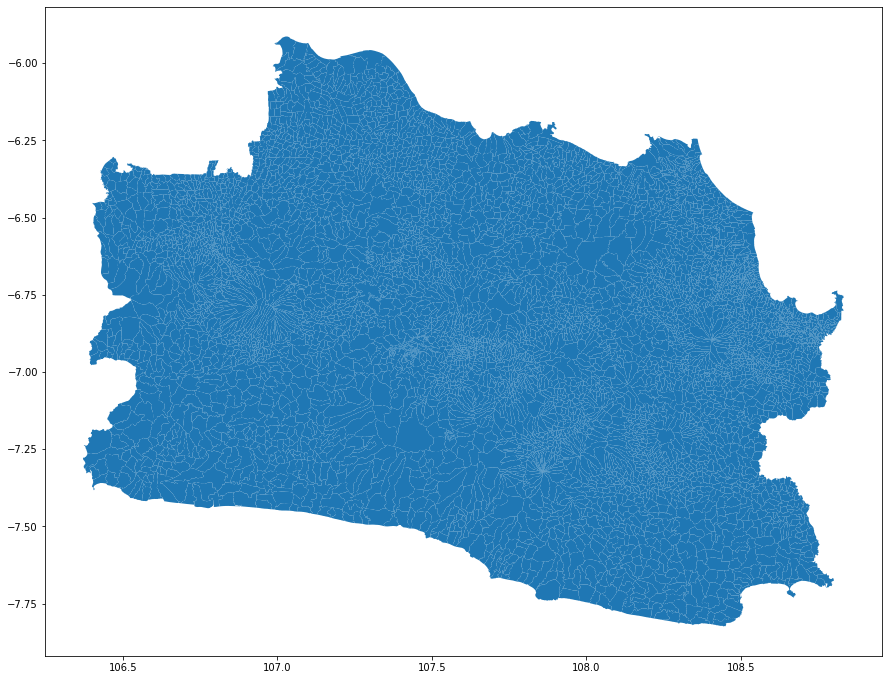

In [246]:
fig,ax = plt.subplots(figsize = (15,15))
jbmap.plot(ax = ax)

Tambah Titik Koordinat Kota & Jalan Tol (Sampel 4 Jalan Tol):  
- Tol Depok - Antasari
- Tol Cinere Jagorawi
- Tol agorawi
- Tol Lkr Bogor

In [247]:
df = pd.read_csv('shape/tollpoint.csv',sep=";")
titik = []
for locs in df['koord'].str.split(","):
    multilocs = []
    for x in locs:
        multilocs.append(Point(float(x.split(" ")[0]),float(x.split(" ")[1])))
    if len(multilocs)>1:
        titik.append(LineString(multilocs))
    else:
        titik.append(multilocs[0])
geo = gpd.GeoDataFrame(df,geometry=titik)

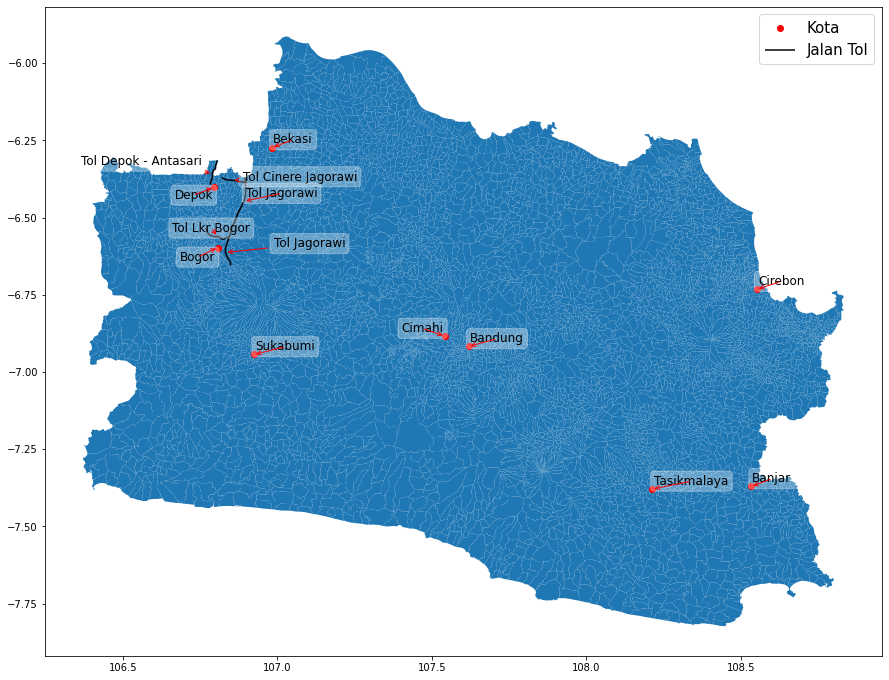

In [248]:
fig,ax = plt.subplots(figsize = (15,15))
jbmap.plot(ax = ax)
geo['coords'] = geo['geometry'].apply(lambda x: x.representative_point().coords[:])
geo['coords'] = [coords[0] for coords in geo['coords']]
bbox = dict(boxstyle="round", alpha=0.3, color='w')
arrowprops = dict(arrowstyle="->", color='red')
annot = []
kota = geo[geo['tipe']=='city'].plot(ax=ax, color='red', label='Kota', zorder=2)
jalan = geo[geo['tipe']=='toll'].plot(ax=ax, color='black', label='Jalan Tol', zorder=1)
for idx, row in geo.iterrows():
    if row['tipe']=='city':
        annot.append(plt.text(row['coords'][0],row['coords'][1],row['nama'], bbox=bbox, fontsize=12))
    if row['tipe']=='toll':
        annot.append(plt.text(row['coords'][0],row['coords'][1],str("Tol " + row['nama']), bbox=bbox, fontsize=12))
adjust_text(annot, expand_text=(1.35, 1.2), arrowprops=arrowprops)
plt.legend(prop = {"size":15})

Ternyata jalan tol tidak menyambungkan antara node setiap kota,   
jadi untuk edges antara node akan dipakai gabungan **Jalan Tol + Jalan Raya + Jalan Lainnya** untuk menyambungkan antara node setiap kota.  
Untuk jalur / edges dan nilai edges diambil berdasarkan navigasi google map.

In [249]:
df = pd.read_csv('shape/roadpoint.csv',sep=";")
titik = []
for locs in df['koord'].str.split(","):
    multilocs = []
    for x in locs:
        multilocs.append(Point(float(x.split(" ")[0]),float(x.split(" ")[1])))
    if len(multilocs)>1:
        titik.append(LineString(multilocs))
    else:
        titik.append(multilocs[0])
geo = gpd.GeoDataFrame(df,geometry=titik)

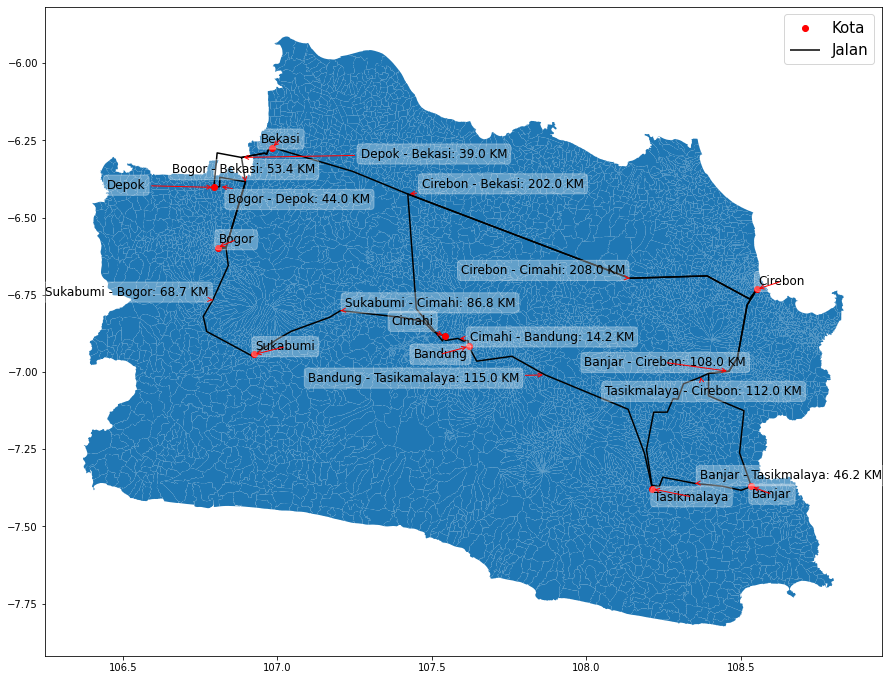

In [250]:
fig,ax = plt.subplots(figsize = (15,15))
jbmap.plot(ax = ax)
geo['coords'] = geo['geometry'].apply(lambda x: x.representative_point().coords[:])
geo['coords'] = [coords[0] for coords in geo['coords']]
bbox = dict(boxstyle="round", alpha=0.3, color='w')
arrowprops = dict(arrowstyle="->", color='red')
annot = []
kota = geo[geo['tipe']=='city'].plot(ax=ax, color='red', label='Kota', zorder=2)
jalan = geo[geo['tipe']=='road'].plot(ax=ax, color='black', label='Jalan', zorder=1)
for idx, row in geo.iterrows():
    if row['tipe']=='city':
        annot.append(plt.text(row['coords'][0],row['coords'][1],row['nama'],bbox=bbox,fontsize=12))
    if row['tipe']=='road':
        annot.append(plt.text(row['coords'][0],row['coords'][1],str(row['nama'])+": "+str(row['length'])+" KM",bbox=bbox,fontsize=12))
adjust_text(annot, expand_text=(1.35, 1.2), arrowprops=arrowprops)
plt.legend(prop = {"size":15})